In [141]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from textblob import TextBlob, Word

In [142]:
df = pd.read_excel(r'reviews_data.xlsx')

In [143]:
df.head()

,title,rating,body,y,cleaned_reviews,classes
0,One of my favorite Amazon purchases ever!,5.0,these are so much fun we ordered the small siz...,2.0,much fun order small size fit standard hardbac...,good
1,As expected but doesn’t fit standard hardcover,4.0,let me start by saying i’ve got a master’s deg...,2.0,let start say got master degre english clearli...,good
2,Happy mom day to me,5.0,these are awesome i should’ve bought the small...,2.0,awesom bought small mani larg book use conceal...,good
3,Perfect for Sonos One,5.0,i wanted to mount a sonos speaker in my bathro...,2.0,want mount sono speaker bathroom drill marbl t...,good
4,Very sturdy even after multiple moves and 5 ye...,5.0,i love these floating bookshelves they give a ...,2.0,love float bookshelv give magic feel room boug...,good


<AxesSubplot:xlabel='rating', ylabel='count'>

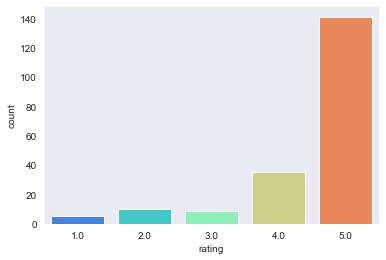

In [144]:
sns.set_style('dark')
sns.countplot(x = df.rating, palette='rainbow')

<AxesSubplot:xlabel='y', ylabel='count'>

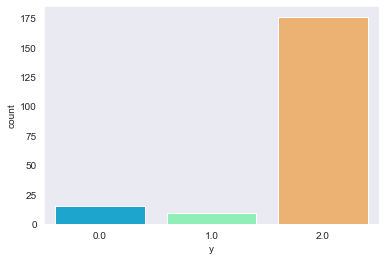

In [145]:
sns.countplot(x = df.y, palette='rainbow')

In [146]:
df.isna().sum()

title              0
rating             0
body               0
y                  0
cleaned_reviews    0
classes            0
dtype: int64

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(df["cleaned_reviews"])
print(TFIDF)

  (0, 1079)	0.1391150918655628
  (0, 618)	0.19177804390044112
  (0, 649)	0.22500466725015236
  (0, 1386)	0.1539826427578327
  (0, 1453)	0.21626492211949777
  (0, 95)	0.19682859343433068
  (0, 974)	0.21626492211949777
  (0, 584)	0.249491545469209
  (0, 994)	0.1391150918655628
  (0, 1493)	0.2357012508046648
  (0, 630)	0.1792013807611016
  (0, 1289)	0.1872092661075439
  (0, 477)	0.1872092661075439
  (0, 20)	0.19177804390044112
  (0, 1483)	0.1253247972010186
  (0, 573)	0.11658505207036406
  (0, 1367)	0.1792013807611016
  (0, 474)	0.249491545469209
  (0, 81)	0.22500466725015236
  (0, 173)	0.06039345244439851
  (0, 595)	0.3220204199960437
  (0, 1270)	0.1663419092219217
  (0, 516)	0.1360213807555311
  (0, 1198)	0.11367895718704343
  (0, 1217)	0.20119767353398427
  :	:
  (198, 458)	0.10893819627067855
  (198, 783)	0.144432410079354
  (198, 766)	0.08841255140329775
  (198, 1454)	0.0695688875417855
  (198, 522)	0.09281109573641814
  (198, 1166)	0.07812311594317946
  (198, 1372)	0.124675220385234

In [148]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: lemmatizer.lemmatize(x))

In [149]:
# Most used words in reviews
freq = pd.Series(' '.join(df["cleaned_reviews"]).split()).value_counts()[0:20]
freq

book      478
shelf     153
use       149
one       132
look      114
shelv     111
larg      107
hold      101
wall       99
small      96
size       94
instal     88
would      82
like       63
love       62
float      57
work       56
need       54
easi       54
anchor     54
dtype: int64

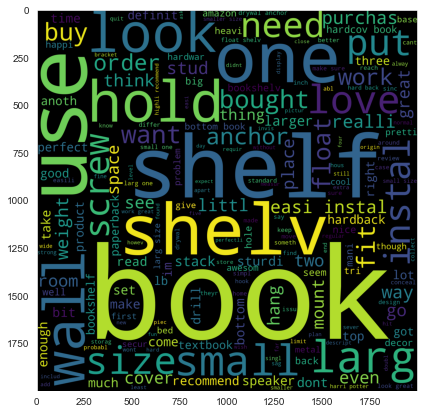

In [150]:
from wordcloud import WordCloud

Review_wordcloud = ' '.join(df["cleaned_reviews"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (7, 7))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [151]:
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [152]:
df['polarity'] = df["cleaned_reviews"].apply(lambda x: TextBlob(x).sentiment[0])
df[['cleaned_reviews','polarity']].head(5)

,cleaned_reviews,polarity
0,much fun order small size fit standard hardbac...,0.142857
1,let start say got master degre english clearli...,0.301786
2,awesom bought small mani larg book use conceal...,0.083333
3,want mount sono speaker bathroom drill marbl t...,0.325000
4,love float bookshelv give magic feel room boug...,0.250000


In [153]:
# Top 5 most positive reviews
df[df.polarity>0].sort_values(by='polarity',ascending=False).head(5)['cleaned_reviews']

177                       look great work well well made
140    great bookshelv price give illus book float wa...
195    look great also sturdi come anchor definit hou...
103    look great everyon ask cookbook float keep min...
98                 great way get book wall make art piec
Name: cleaned_reviews, dtype: object

In [154]:
def replace(x):
    if x == 0:
        return "natural"
    elif x>0:
        return "positive"
    else:
        return "negative"

In [155]:
df['polarity'] = df['polarity'].apply(lambda x: replace(x))

In [156]:
df.head()

,title,rating,body,y,cleaned_reviews,classes,polarity
0,One of my favorite Amazon purchases ever!,5.0,these are so much fun we ordered the small siz...,2.0,much fun order small size fit standard hardbac...,good,positive
1,As expected but doesn’t fit standard hardcover,4.0,let me start by saying i’ve got a master’s deg...,2.0,let start say got master degre english clearli...,good,positive
2,Happy mom day to me,5.0,these are awesome i should’ve bought the small...,2.0,awesom bought small mani larg book use conceal...,good,positive
3,Perfect for Sonos One,5.0,i wanted to mount a sonos speaker in my bathro...,2.0,want mount sono speaker bathroom drill marbl t...,good,positive
4,Very sturdy even after multiple moves and 5 ye...,5.0,i love these floating bookshelves they give a ...,2.0,love float bookshelv give magic feel room boug...,good,positive


<AxesSubplot:xlabel='polarity', ylabel='count'>

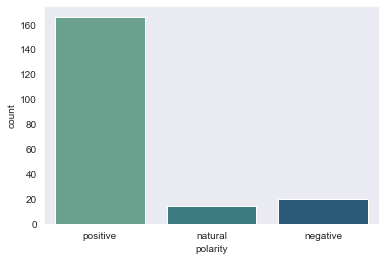

In [157]:
sns.countplot(x = df.polarity, palette='crest')

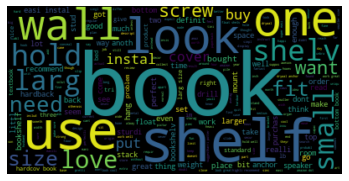

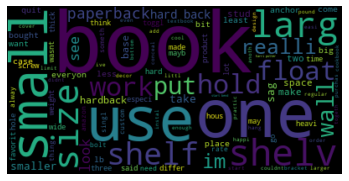

In [158]:
# Positive and Negative reviews word clouds
positive_reviews= df[df.polarity=='positive']
negative_reviews= df[df.polarity=='negative']
positive_reviews_text=" ".join(positive_reviews.cleaned_reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.cleaned_reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

In [164]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df['cleaned_reviews'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df.index
df_dtm.head(3)

,abl,absolut,abt,academ,accent,access,accessori,accident,accommod,accomplish,...,ye,yeah,year,yet,yield,youd,youll,your,youtub,youv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df_dtm.shape

(200, 1541)

In [166]:
df.shape

(200, 7)

In [167]:
df_dtm['y'] = df.y

In [172]:
df_dtm['y']  = df_dtm['y'].apply(lambda x:int(x))

In [181]:
X = df_dtm.drop('y',axis=1)
y = df_dtm['y'].values

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [183]:
from sklearn.naive_bayes import GaussianNB

In [184]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [185]:
nb.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [186]:
y_test

array([1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [187]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier()
rnd.fit(X_train,y_train)

RandomForestClassifier()

In [188]:
rnd.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [190]:
X_train

,abl,absolut,abt,academ,accent,access,accessori,accident,accommod,accomplish,...,ye,yeah,year,yet,yield,youd,youll,your,youtub,youv
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
92,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
y_train

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2], dtype=int64)